#IS 470 Lab 4: Naive Bayes

---

This data set contains information of cars purchased at the Auction.
<br>
We will use this file to predict the quality of buying decisions and visualize decision processes.
<br>
<br>
VARIABLE DESCRIPTIONS:<br>
Auction: Auction provider at which the  vehicle was purchased<br>
Color: Vehicle Color<br>
IsBadBuy: Identifies if the kicked vehicle was an avoidable purchase<br>
MMRCurrentAuctionAveragePrice: Acquisition price for this vehicle in average condition as of current day<br>
Size: The size category of the vehicle (Compact, SUV, etc.)<br>
TopThreeAmericanName:Identifies if the manufacturer is one of the top three American manufacturers<br>
VehBCost: Acquisition cost paid for the vehicle at time of purchase<br>
VehicleAge: The Years elapsed since the manufacturer's year<br>
VehOdo: The vehicles odometer reading<br>
WarrantyCost: Warranty price (term=36month  and millage=36K)<br>
WheelType: The vehicle wheel type description (Alloy, Covers)<br>
<br>
Target variable: **IsBadBuy**

###1. Upload and clean data

In [ ]:
# Upload data
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

In [1]:
# Import libraries
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import tree
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

In [2]:
# Read data
carAuction = pd.read_csv("carAuction.csv")
carAuction

,Auction,Color,IsBadBuy,MMRCurrentAuctionAveragePrice,Size,TopThreeAmericanName,VehBCost,VehicleAge,VehOdo,WarrantyCost,WheelType
0,ADESA,WHITE,No,2871,LARGE TRUCK,FORD,5300,8,75419,869,Alloy
1,ADESA,GOLD,Yes,1840,VAN,FORD,3600,8,82944,2322,Alloy
2,ADESA,RED,No,8931,SMALL SUV,CHRYSLER,7500,4,57338,588,Alloy
3,ADESA,GOLD,No,8320,CROSSOVER,FORD,8500,5,55909,1169,Alloy
4,ADESA,GREY,No,11520,LARGE TRUCK,FORD,10100,5,86702,853,Alloy
...,...,...,...,...,...,...,...,...,...,...,...
9995,ADESA,RED,No,7536,SMALL SUV,CHRYSLER,6600,4,85377,983,Alloy
9996,ADESA,BLACK,No,4921,LARGE TRUCK,GM,7000,7,89665,1543,Alloy
9997,ADESA,BLACK,No,9263,MEDIUM SUV,CHRYSLER,9000,4,59383,1417,Alloy
9998,ADESA,BLUE,No,3240,MEDIUM,OTHER,5500,4,48642,482,Covers


In [3]:
# Show the head rows of a data frame
carAuction.head()

,Auction,Color,IsBadBuy,MMRCurrentAuctionAveragePrice,Size,TopThreeAmericanName,VehBCost,VehicleAge,VehOdo,WarrantyCost,WheelType
0,ADESA,WHITE,No,2871,LARGE TRUCK,FORD,5300,8,75419,869,Alloy
1,ADESA,GOLD,Yes,1840,VAN,FORD,3600,8,82944,2322,Alloy
2,ADESA,RED,No,8931,SMALL SUV,CHRYSLER,7500,4,57338,588,Alloy
3,ADESA,GOLD,No,8320,CROSSOVER,FORD,8500,5,55909,1169,Alloy
4,ADESA,GREY,No,11520,LARGE TRUCK,FORD,10100,5,86702,853,Alloy


In [4]:
# Examine variable type
carAuction.dtypes

Auction                          object
Color                            object
IsBadBuy                         object
MMRCurrentAuctionAveragePrice     int64
Size                             object
TopThreeAmericanName             object
VehBCost                          int64
VehicleAge                        int64
VehOdo                            int64
WarrantyCost                      int64
WheelType                        object
dtype: object

In [5]:
# Change categorical variables to "category"
carAuction['Auction'] = carAuction['Auction'].astype('category')
carAuction['Color'] = carAuction['Color'].astype('category')
carAuction['IsBadBuy'] = carAuction['IsBadBuy'].astype('category')
carAuction['Size'] = carAuction['Size'].astype('category')
carAuction['TopThreeAmericanName'] = carAuction['TopThreeAmericanName'].astype('category')
carAuction['WheelType'] = carAuction['WheelType'].astype('category')

In [6]:
# Examine variable type
carAuction.dtypes

Auction                          category
Color                            category
IsBadBuy                         category
MMRCurrentAuctionAveragePrice       int64
Size                             category
TopThreeAmericanName             category
VehBCost                            int64
VehicleAge                          int64
VehOdo                              int64
WarrantyCost                        int64
WheelType                        category
dtype: object

###2. Partition the data set for Naive Bayes model

In [7]:
# Select categorical variables
carAuction_category = carAuction.select_dtypes(include=['category'])
carAuction_category

,Auction,Color,IsBadBuy,Size,TopThreeAmericanName,WheelType
0,ADESA,WHITE,No,LARGE TRUCK,FORD,Alloy
1,ADESA,GOLD,Yes,VAN,FORD,Alloy
2,ADESA,RED,No,SMALL SUV,CHRYSLER,Alloy
3,ADESA,GOLD,No,CROSSOVER,FORD,Alloy
4,ADESA,GREY,No,LARGE TRUCK,FORD,Alloy
...,...,...,...,...,...,...
9995,ADESA,RED,No,SMALL SUV,CHRYSLER,Alloy
9996,ADESA,BLACK,No,LARGE TRUCK,GM,Alloy
9997,ADESA,BLACK,No,MEDIUM SUV,CHRYSLER,Alloy
9998,ADESA,BLUE,No,MEDIUM,OTHER,Covers


In [8]:
# Create dummy variables
carAuction = pd.get_dummies(carAuction_category, columns=['Auction','Color','Size','TopThreeAmericanName','WheelType'], drop_first=True)
carAuction

,IsBadBuy,Auction_MANHEIM,Auction_OTHER,Color_BLACK,Color_BLUE,Color_BROWN,Color_GOLD,Color_GREEN,Color_GREY,Color_MAROON,Color_NOT AVAIL,Color_ORANGE,Color_OTHER,Color_PURPLE,Color_RED,Color_SILVER,Color_WHITE,Color_YELLOW,Size_CROSSOVER,Size_LARGE,Size_LARGE SUV,Size_LARGE TRUCK,Size_MEDIUM,Size_MEDIUM SUV,Size_SMALL SUV,Size_SMALL TRUCK,Size_SPECIALTY,Size_SPORTS,Size_VAN,TopThreeAmericanName_FORD,TopThreeAmericanName_GM,TopThreeAmericanName_OTHER,WheelType_Covers,WheelType_Special,WheelType_unkwnWheel
0,No,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
1,Yes,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
2,No,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,No,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,No,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,No,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9996,No,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
9997,No,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
9998,No,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0


In [9]:
# Partition the data
target = carAuction['IsBadBuy']
predictors = carAuction.drop(['IsBadBuy'],axis=1)
predictors_train, predictors_test, target_train, target_test = train_test_split(predictors, target, test_size=0.3, random_state=0)
print(predictors_train.shape, predictors_test.shape, target_train.shape, target_test.shape)

(7000, 34) (3000, 34) (7000,) (3000,)


In [10]:
# Examine the porportion of target variable for training data set
print(target_train.value_counts(normalize=True))

No     0.869571
Yes    0.130429
Name: IsBadBuy, dtype: float64


In [11]:
# Examine the porportion of target variable for testing data set
print(target_test.value_counts(normalize=True))

No     0.872667
Yes    0.127333
Name: IsBadBuy, dtype: float64


## 3. Naive Bayes model prediction

In [12]:
# Build a Naive Bayes model on training data with default setting
model = MultinomialNB()
model.fit(predictors_train, target_train)

MultinomialNB()

In [13]:
# Make predictions on testing data
prediction_on_test = model.predict(predictors_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


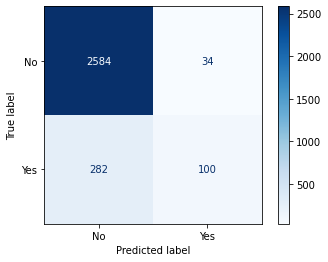

In [14]:
# Examine the evaluation results on testing data: confusion_matrix
plot_confusion_matrix(model, predictors_test, target_test, cmap=plt.cm.Blues, values_format='d')

Q1. On the testing set, how many bad buy cars are predicted as Not bad buy?<br>
282

Q2. On the testing set, how many cars are predicted as Not bad buy?<br>
2584 + 282 = 2866

Q3. On the testing set, how many bad buy cars are identified correctly by the naive bayes model in testing data?<br>
100

Q4. On the testing set, if the naive bayes predicts a car as bad buy, what is the probability that such prediction is correct?<br>
100 / 100+34 = 0.746






In [15]:
# Examine the evaluation results on testing data: accuracy, precision, recall, and f1-score
print(classification_report(target_test, prediction_on_test))

              precision    recall  f1-score   support

          No       0.90      0.99      0.94      2618
         Yes       0.75      0.26      0.39       382

    accuracy                           0.89      3000
   macro avg       0.82      0.62      0.66      3000
weighted avg       0.88      0.89      0.87      3000



Q5. Does the naive bayes model have better performance on majority (IsBadBuy = 'No') or minority class (IsBadBuy = 'Yes')? why? <br>
Better performance on majority class because 'No' f1-score is 0.94 > 0.39 'Yes' f1-score.

## 4. Decision Tree model prediction

In [16]:
# Build a decision tree model on training data with max_depth = 2
model_tree = DecisionTreeClassifier(criterion = "entropy", random_state=1, max_depth=2)
model_tree.fit(predictors_train, target_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=1)

[Text(0.5, 0.8333333333333334, 'WheelType_unkwnWheel <= 0.5\nentropy = 0.559\nsamples = 7000\nvalue = [6087, 913]\nclass = No'),
 Text(0.25, 0.5, 'Auction_MANHEIM <= 0.5\nentropy = 0.472\nsamples = 6686\nvalue = [6011, 675]\nclass = No'),
 Text(0.125, 0.16666666666666666, 'entropy = 0.389\nsamples = 2804\nvalue = [2590, 214]\nclass = No'),
 Text(0.375, 0.16666666666666666, 'entropy = 0.526\nsamples = 3882\nvalue = [3421, 461]\nclass = No'),
 Text(0.75, 0.5, 'Auction_MANHEIM <= 0.5\nentropy = 0.798\nsamples = 314\nvalue = [76, 238]\nclass = Yes'),
 Text(0.625, 0.16666666666666666, 'entropy = 0.567\nsamples = 247\nvalue = [33, 214]\nclass = Yes'),
 Text(0.875, 0.16666666666666666, 'entropy = 0.941\nsamples = 67\nvalue = [43, 24]\nclass = No')]

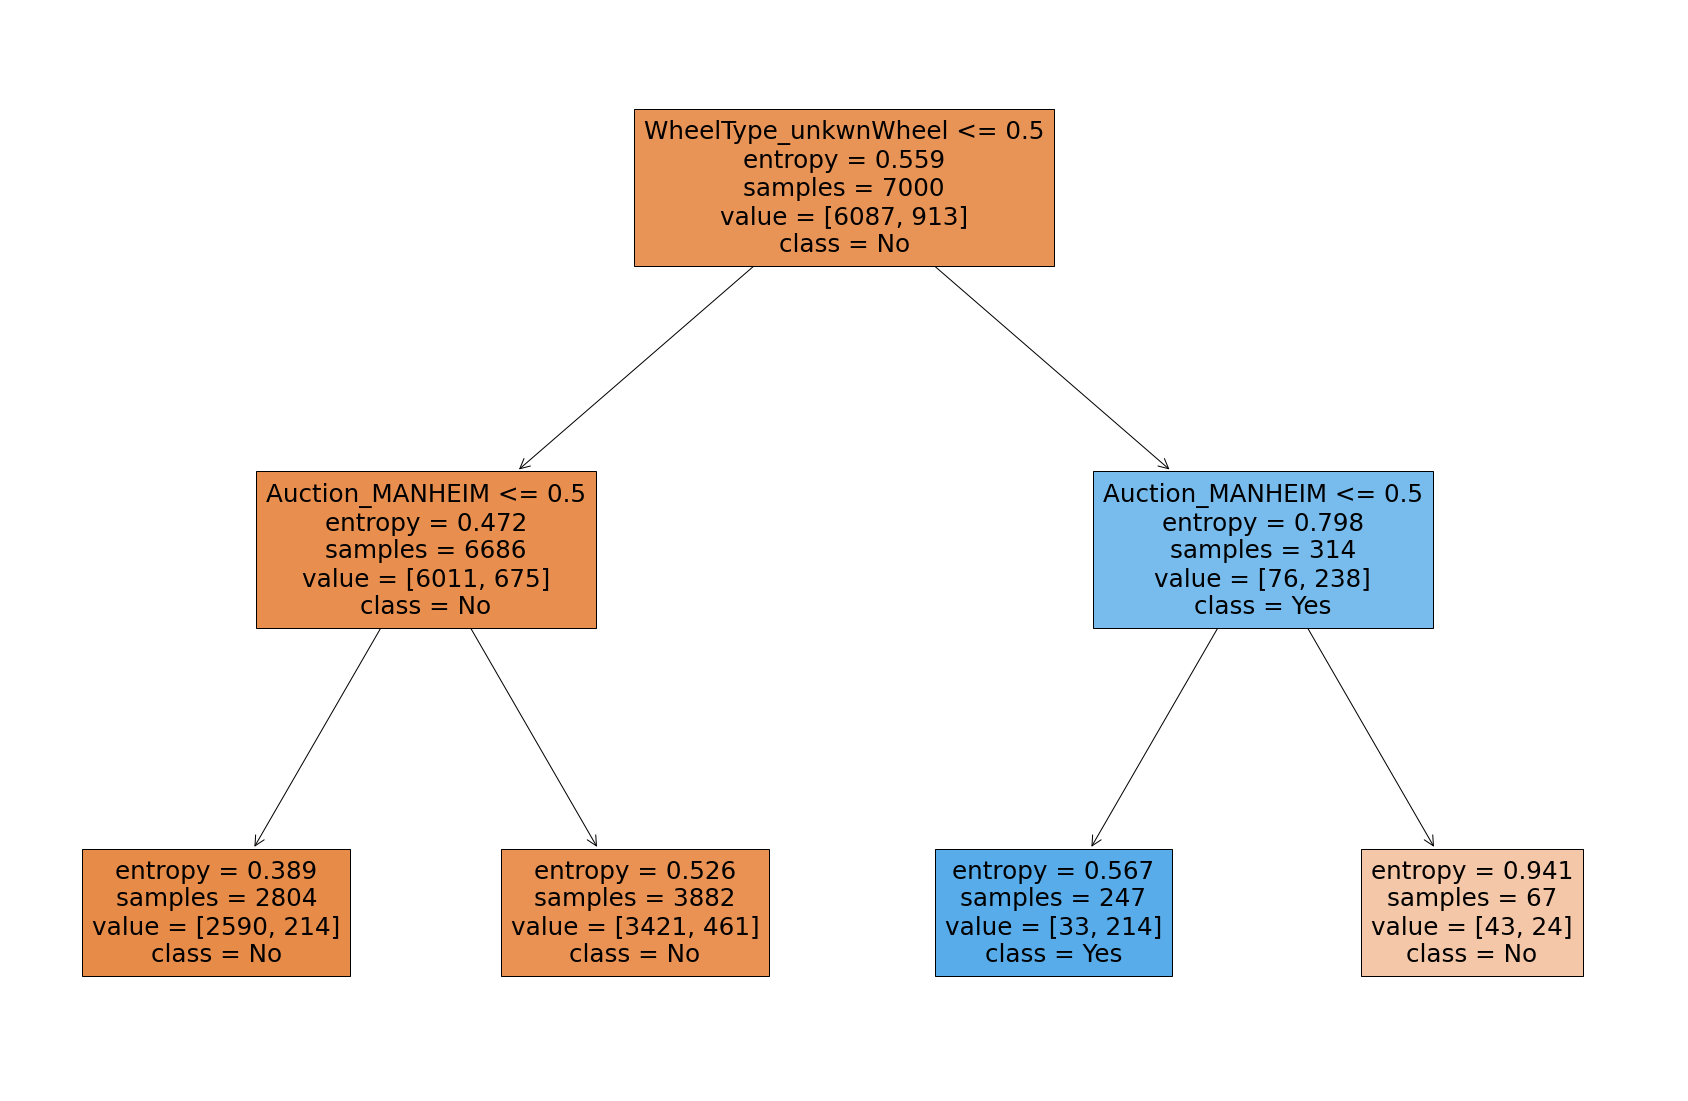

In [17]:
# Plot the tree
fig = plt.figure(figsize=(30,20))
tree.plot_tree(model_tree, feature_names=list(predictors_train.columns), class_names=['No','Yes'], filled=True)

In [18]:
# Make predictions on testing data
prediction_on_test = model_tree.predict(predictors_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


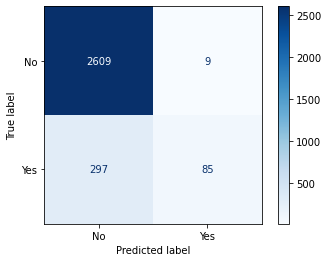

In [19]:
# Examine the evaluation results on testing data: confusion_matrix
plot_confusion_matrix(model_tree, predictors_test, target_test, cmap=plt.cm.Blues, values_format='d')

In [20]:
# Examine the evaluation results on testing data: accuracy, precision, recall, and f1-score
print(classification_report(target_test, prediction_on_test))

              precision    recall  f1-score   support

          No       0.90      1.00      0.94      2618
         Yes       0.90      0.22      0.36       382

    accuracy                           0.90      3000
   macro avg       0.90      0.61      0.65      3000
weighted avg       0.90      0.90      0.87      3000



Q6. Compared to the naive bayes model, which model can better identify Bad Buy cars? why? <br>
Naive Bayes model is better because 'Yes' f1-score in Naive Bayes model is higher than in decision-tree. 


Q7. Assume the following costs/benefits: 
*   Cost of buying a bad car: \$2500
*   Profit of purchasing a good car: \$350
*   Opportunity cost of a good car that is missed: \$350
<br>
Based on the above costs / benefits, what is the total net benefit / cost of the two models (decision tree and naive bayes) on testing data?<br>

Naive Bayes:
Cost of buying a bad car: 282 * 2500 = $705,000 

Profit of purchasing a good car: 2584 * 350 = $904,400 

Opportunity cost of a good car that is missed: 34 * 350 = $11,900 

Profit - Cost - Opportunity Cost = $187,500

Decision-tree:

Cost of buying a bad car: 297 * 2500 = $742,500 

Profit of purchasing a good car: 2609 * 350 = $913,150

Opportunity cost of a good car that is missed: 9 * 350 = $3,150

Profit - Cost - Opportunity Cost = $167,500

Naive Bayes model is better because it provides more profit. 


***Download the html file and submit to BeachBoard***<br>
<br>
1.   ***Download the lab4.ipynb file***
2.   ***Upload the lab4.ipynb file***
3.   ***Run the code below to generate a html file***
4.   ***Download the html file and submit to BeachBoard***

In [ ]:
!jupyter nbconvert --to html IS470_lab4.ipynb